In [1]:
import json
import tensorflow as tf

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization,Conv2D, GlobalAveragePooling1D

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Thesis Slide/Datasets /Bangla Online Comments Dataset.csv', sep = ',', encoding = 'utf-8-sig')

In [4]:
data

comment    Category  Gender  \
0      ржУржЗ рж╣рж╛рж▓рж╛рж░ ржкрзБржд ржПржЦржи ржХрж┐ ржоржж ржЦрж╛ржУржпрж╝рж╛рж░ рж╕ржоржпрж╝ рж░рж╛рждрзЗрж░ ржмрзЗрж▓рж╛...       Actor  Female   
1      ржШрж░рзЗ ржмрж╕рзЗ рж╢рзБржЯ ржХрж░рждрзЗ ржХрзЗржоржи рж▓рзЗржЧрзЗржЫрзЗ? ржХрзНржпрж╛ржорзЗрж░рж╛рждрзЗ ржХрзЗ ржЫрж┐...      Singer    Male   
2                           ржЕрж░рзЗ ржмрж╛ржмрж╛, ржПржЗ ржЯрж╛ ржХрзЛржи ржкрж╛ржЧрж▓????       Actor  Female   
3                                  ржХрзНржпрж╛ржкрзНржЯрзЗржи ржЕржл ржмрж╛ржВрж▓рж╛ржжрзЗрж╢      Sports    Male   
4                                               ржкржЯржХрж╛ ржорж╛ржЫ  Politician    Male   
...                                                  ...         ...     ...   
43996                               рж╣рж┐рж░рзЛ ржЖрж▓ржо,, ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ      Social    Male   
43997  рж╣рж┐рж░рзЛ ржЖрж▓ржоржХрзЗ рж╕рж╛ржкрзЛрж░рзНржЯ ржжрзЗржУржпрж╝рж╛рж░ ржЬржирзНржп ржЕрж╕ржВржЦрзНржп ржзржирзНржпржмрж╛ржж...      Social    Male   
43998                            рж╣рж┐рж░рзЛ ржнрж╛ржЗ рждрзБржорж┐ ржПржЧрж┐рзЯрзЗ рзЯрж╛ржУ      Social    Male   
43999     рж╣рзБржо ржнрж╛ржУ рждрзЛржорж░рж╛ ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ ржЖржорж░рж╛ рждрзЛржорж╛ржжрзЗрж░ ржкрж┐ржЫржирзЗ ржЖржЫрж┐       Actor  Female   
44000            рж╣рзНржпрж╛рж▓рзЛ рждрзЛржорж╛ржжрзЗрж░ рж╕рж╛ржерзЗ ржХрж┐ ржЖржорж╛ржХрзЗ ржЪрзНржпрж╛ржЯ ржХрж░ржмрзЗ      Social    Male   

       comment react number      label  
0                       1.0     sexual  
1                       2.0  not bully  
2                       2.0  not bully  
3                       0.0  not bully  
4                       0.0      troll  
...                     ...        ...  
43996                   0.0  not bully  
43997                   1.0  not bully  
43998                   0.0  not bully  
43999                   1.0  not bully  
44000                   0.0  not bully  

[44001 rows x 5 columns]

In [5]:
vocab_size = 19469
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 9600


In [6]:
label = data['label'].values.tolist()
comment = data['comment'].values.tolist()
category = data['Category'].values.tolist()
gender = data['Gender'].values.tolist()
print(label[0])

sexual


In [7]:
#Remove emojis
import re


def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               u"\u09E6-\u09EF"#banglanumerical code
                               u"\u0030-\u0039"#englishnumercal code
                               u"\u0041-\u005A"#uppercaseenglish alphabet
                               u"\u0061-\u007A"#lowercaseenglish alphabet
                               u"\u2019"
                               u"\u2018"
                               u"\u201C"
                               u"\u201D"
                               u"\u201E"
                               u"\u201F"

                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

data['new']=data['comment'].apply(remove_emoji)

In [8]:
data

comment    Category  Gender  \
0      ржУржЗ рж╣рж╛рж▓рж╛рж░ ржкрзБржд ржПржЦржи ржХрж┐ ржоржж ржЦрж╛ржУржпрж╝рж╛рж░ рж╕ржоржпрж╝ рж░рж╛рждрзЗрж░ ржмрзЗрж▓рж╛...       Actor  Female   
1      ржШрж░рзЗ ржмрж╕рзЗ рж╢рзБржЯ ржХрж░рждрзЗ ржХрзЗржоржи рж▓рзЗржЧрзЗржЫрзЗ? ржХрзНржпрж╛ржорзЗрж░рж╛рждрзЗ ржХрзЗ ржЫрж┐...      Singer    Male   
2                           ржЕрж░рзЗ ржмрж╛ржмрж╛, ржПржЗ ржЯрж╛ ржХрзЛржи ржкрж╛ржЧрж▓????       Actor  Female   
3                                  ржХрзНржпрж╛ржкрзНржЯрзЗржи ржЕржл ржмрж╛ржВрж▓рж╛ржжрзЗрж╢      Sports    Male   
4                                               ржкржЯржХрж╛ ржорж╛ржЫ  Politician    Male   
...                                                  ...         ...     ...   
43996                               рж╣рж┐рж░рзЛ ржЖрж▓ржо,, ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ      Social    Male   
43997  рж╣рж┐рж░рзЛ ржЖрж▓ржоржХрзЗ рж╕рж╛ржкрзЛрж░рзНржЯ ржжрзЗржУржпрж╝рж╛рж░ ржЬржирзНржп ржЕрж╕ржВржЦрзНржп ржзржирзНржпржмрж╛ржж...      Social    Male   
43998                            рж╣рж┐рж░рзЛ ржнрж╛ржЗ рждрзБржорж┐ ржПржЧрж┐рзЯрзЗ рзЯрж╛ржУ      Social    Male   
43999     рж╣рзБржо ржнрж╛ржУ рждрзЛржорж░рж╛ ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ ржЖржорж░рж╛ рждрзЛржорж╛ржжрзЗрж░ ржкрж┐ржЫржирзЗ ржЖржЫрж┐       Actor  Female   
44000            рж╣рзНржпрж╛рж▓рзЛ рждрзЛржорж╛ржжрзЗрж░ рж╕рж╛ржерзЗ ржХрж┐ ржЖржорж╛ржХрзЗ ржЪрзНржпрж╛ржЯ ржХрж░ржмрзЗ      Social    Male   

       comment react number      label  \
0                       1.0     sexual   
1                       2.0  not bully   
2                       2.0  not bully   
3                       0.0  not bully   
4                       0.0      troll   
...                     ...        ...   
43996                   0.0  not bully   
43997                   1.0  not bully   
43998                   0.0  not bully   
43999                   1.0  not bully   
44000                   0.0  not bully   

                                                     new  
0      ржУржЗ рж╣рж╛рж▓рж╛рж░ ржкрзБржд ржПржЦржи ржХрж┐ ржоржж ржЦрж╛ржУржпрж╝рж╛рж░ рж╕ржоржпрж╝ рж░рж╛рждрзЗрж░ ржмрзЗрж▓рж╛...  
1      ржШрж░рзЗ ржмрж╕рзЗ рж╢рзБржЯ ржХрж░рждрзЗ ржХрзЗржоржи рж▓рзЗржЧрзЗржЫрзЗ? ржХрзНржпрж╛ржорзЗрж░рж╛рждрзЗ ржХрзЗ ржЫрж┐...  
2                           ржЕрж░рзЗ ржмрж╛ржмрж╛, ржПржЗ ржЯрж╛ ржХрзЛржи ржкрж╛ржЧрж▓????  
3                                  ржХрзНржпрж╛ржкрзНржЯрзЗржи ржЕржл ржмрж╛ржВрж▓рж╛ржжрзЗрж╢  
4                                               ржкржЯржХрж╛ ржорж╛ржЫ  
...                                                  ...  
43996                               рж╣рж┐рж░рзЛ ржЖрж▓ржо,, ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ  
43997  рж╣рж┐рж░рзЛ ржЖрж▓ржоржХрзЗ рж╕рж╛ржкрзЛрж░рзНржЯ ржжрзЗржУржпрж╝рж╛рж░ ржЬржирзНржп ржЕрж╕ржВржЦрзНржп ржзржирзНржпржмрж╛ржж...  
43998                            рж╣рж┐рж░рзЛ ржнрж╛ржЗ рждрзБржорж┐ ржПржЧрж┐рзЯрзЗ рзЯрж╛ржУ  
43999     рж╣рзБржо ржнрж╛ржУ рждрзЛржорж░рж╛ ржПржЧрж┐рзЯрзЗ ржпрж╛ржУ ржЖржорж░рж╛ рждрзЛржорж╛ржжрзЗрж░ ржкрж┐ржЫржирзЗ ржЖржЫрж┐  
44000            рж╣рзНржпрж╛рж▓рзЛ рждрзЛржорж╛ржжрзЗрж░ рж╕рж╛ржерзЗ ржХрж┐ ржЖржорж╛ржХрзЗ ржЪрзНржпрж╛ржЯ ржХрж░ржмрзЗ  

[44001 rows x 6 columns]

In [9]:
#Stopword
sw = pd.read_csv("/content/drive/MyDrive/Thesis Slide/Datasets /stopwords-bn.csv")
sw.columns = ['Words']
sw.head()
sw = sw['Words']
sw.shape

(397,)

In [10]:
stop_words = ['ржП', 'рж╣рзЯ', 'ржХрж┐', 'ржХрзА', 'ржПрж░', 'ржХрзЗ', 'ржпрзЗ', 'ржПржЗ', 'ржмрж╛', 'рж╕ржм', 'ржЯрж┐', 'рждрж╛',
       'рж╕рзЗ', 'рждрж╛ржЗ', 'рж╕рзЗржЗ', 'рждрж╛рж░', 'ржЖржЧрзЗ', 'ржпржжрж┐', 'ржЖржЫрзЗ', 'ржЖржорж┐', 'ржПржмржВ', 'ржХрж░рзЗ', 'ржХрж╛рж░', 'ржПржЯрж┐', 'рж╣рждрзЗ', 'ржпрж╛рзЯ',
       'ржЖрж░ржУ', 'ржпрж╛ржХ', 'ржЦрзБржм', 'ржЙржкрж░', 'ржкрж░рзЗ', 'рж╣ржмрзЗ', 'ржХрзЗржи', 'ржХржЦржи', 'рж╕ржХрж▓', 'рж╣ржпрж╝', 'ржарж┐ржХ', 'ржПржХржЗ', 'ржХрзЛржи',
       'ржЫрж┐рж▓', 'ржЦрзБржмржЗ', 'ржХрзЛржирзЛ', 'ржЕржзрзАржи', 'ржпрж╛рж░рж╛', 'рждрж╛рж░рж╛', 'ржЧрзБрж▓рж┐', 'рждрж╛ржХрзЗ', 'рж╕рзЗржЯрж╛', 'рж╕ржоржпрж╝', 'ржЖржорж╛рж░', 'ржЖржорж░рж╛', 'рж╕ржмрж╛рж░',
       'ржЙржнржпрж╝', 'ржПржХржЯрж╛', 'ржЖржкржирж┐', 'ржирж┐рзЯрзЗ', 'ржПржХржЯрж┐', 'ржмржирзНржз', 'ржЬржирзНржп', 'рж╢рзБржзрзБ', 'ржпрзЗржЯрж╛', 'ржЙржЪрж┐ржд', 'ржорж╛ржЭрзЗ', 'ржерзЗржХрзЗ', 'ржХрж░ржмрзЗ',
       'ржЖржмрж╛рж░', 'ржЙржкрж░рзЗ', 'рж╕рзЗржЯрж┐', 'ржХрж┐ржЫрзБ', 'ржХрж╛рж░ржг', 'ржпрзЗржоржи', 'рждрж┐ржирж┐', 'ржоржзрзНржпрзЗ', 'ржЖржорж╛ржХрзЗ', 'ржХрж░ржЫрзЗржи', 'рждрзБрж▓ржирж╛', 'рждрж╛рж░ржкрж░',
       'ржирж┐ржЬрзЗржЗ', 'ржерж╛ржХрж╛рж░', 'ржирж┐ржЬрзЗрж░', 'ржкрж╛рж░рзЗржи', 'ржПржХржмрж╛рж░', 'рж╕ржЩрзНржЧрзЗ', 'ржЗржЪрзНржЫрж╛', 'ржирзАржЪрзЗрж░', 'ржПржЧрзБрж▓рзЛ', 'ржЖржкржирж╛рж░', 'ржЕржзрзАржирзЗ', 'ржХрж┐ржВржмрж╛',
       'ржПржЦрж╛ржирзЗ', 'рждрж╛рж╣рж▓рзЗ', 'ржХржпрж╝рзЗржХ', 'ржЬржирзНржпрзЗ', 'рж╣ржЪрзНржЫрзЗ', 'рждрж╛ржжрзЗрж░', 'ржХрзЛржерж╛ржпрж╝', 'ржХрж┐ржирзНрждрзБ', 'ржирж┐ржЬрзЗржХрзЗ', 'ржпрждржХрзНрж╖ржг', 'ржЖржорж╛ржжрзЗрж░',
       'ржжрзНржмрж╛рж░рж╛', 'рж╣ржпрж╝рзЗржЫрзЗ', ' рж╕ржЩрзНржЧрзЗ', 'рж╕рзЗржЦрж╛ржирзЗ', 'ржХрж┐ржнрж╛ржмрзЗ', 'ржорж╛ржзрзНржпржорзЗ', 'ржирж┐ржЬрзЗржжрзЗрж░', 'рждрзБрж▓ржирж╛ржпрж╝', 'ржкрзНрж░рждрж┐ржЯрж┐',
       'рждрж╛ржжрзЗрж░ржХрзЗ', 'ржЗрждрзНржпрж╛ржжрж┐', 'рж╕ржорзНржкрж░рзНржХрзЗ', 'рж╕рж░рзНржмрж╛ржзрж┐ржХ', 'ржмрж┐рж░рзБржжрзНржзрзЗ', 'ржЕржирзНржпрж╛ржирзНржп','ржжрзЗржЦрж╛ржЪрзНржЫрзЗ','ржПржЗрж╕ржм','ржПржХржЗ','ржЪрж╛рзЯ','ржжрж┐рзЯрзЗ','ржЕржержЪ','ржирж┐рзЯрзЗ','ржмрж╛ржХрж┐','ржХрж┐ржирзНрждрзБ','ржПржжрзЗрж░','ржЕржирзЗржХ','ржкрж╛рж░рзЗржирж╛','ржжрзЗржЦрж╛ржи' ,'ржПржХ' ,'рж╣рзЯрзЗ','ржХрж░ржЫрзЗ ','ржЫрж╛рзЬрж╛','рждрзБржЗ','рждрзЛрж░','рждрзБржорж┐ржУ','ржжрзЗрзЯрж╛ ','ржерзЗржХрзЗ','ржУрзЯрж╛','ржирж┐ржЬрж╛рж░','ржЫрж┐ржГ','ржХрж┐ржЫрзБ','ржерж╛ржХрзЗ','рждрзБрж░','рждрзЛ','рждрж░ржл','ржжрж┐рзЯрзЗржЫрзЗ','рж░рзЗржЦрзЗ', 'ржЧрзЗржЫрзЗ ','рждрзЗ',
      'ржЖржкржирж╛рж░рж╛','ржЕрж░','ржПржХржЯрзБ','ржЖржкржирж╛ржжрзЗрж░ржХрзЗ','ржПржХржЬржи''ржжрзЗрзЯрж╛','ржЖржкржирж╛рж░ржЯрж╛','ржЖржкржирж╛ржХрзЗ','ржоржд','ржЖржкржирж┐ржУ','ржЖржкржирж┐ржЗ','ржЖржирж╛','рж╣рзЯрзЗржЫрзЗ','ржЖржЬржХрзЗ','рждрзЛрж░рзЗ','ржЖржЬржУ','ржЖржЫрзЛрж╕','ржЖржЫрж┐','ржЖржЪрзНржЫрж╛','ржЖржЬржХрзЗ','ржЖржЫрж┐рж▓рж┐','ржЖржЫрж┐рж╕','ржЖржЫрзЗржи','ржЖржЧрзЗржУ','ржЖржорж░рж╛ржУ','ржЖржорж┐ржУ','ржЖрж░рзЗ','ржЖрж░рзЗржХ','ржЖрж░рзЗржХржЬржиржХрзЗ','ржХрж░ржЫрж┐','ржЖрж╕рзЗржи','ржЗржЙ','ржЗржХржЯрзБ','ржЗрзЯрзЗ','ржЗрзЯрзЗрж╕']
for i in range(sw.shape[0]):
    stop_words.append(sw[i])
print(type(stop_words))
print(len(stop_words))
print(stop_words)

data['new']=data['new'].apply(lambda x: [item for item in x if item not in stop_words])

<class 'list'>
580
['ржП', 'рж╣рзЯ', 'ржХрж┐', 'ржХрзА', 'ржПрж░', 'ржХрзЗ', 'ржпрзЗ', 'ржПржЗ', 'ржмрж╛', 'рж╕ржм', 'ржЯрж┐', 'рждрж╛', 'рж╕рзЗ', 'рждрж╛ржЗ', 'рж╕рзЗржЗ', 'рждрж╛рж░', 'ржЖржЧрзЗ', 'ржпржжрж┐', 'ржЖржЫрзЗ', 'ржЖржорж┐', 'ржПржмржВ', 'ржХрж░рзЗ', 'ржХрж╛рж░', 'ржПржЯрж┐', 'рж╣рждрзЗ', 'ржпрж╛рзЯ', 'ржЖрж░ржУ', 'ржпрж╛ржХ', 'ржЦрзБржм', 'ржЙржкрж░', 'ржкрж░рзЗ', 'рж╣ржмрзЗ', 'ржХрзЗржи', 'ржХржЦржи', 'рж╕ржХрж▓', 'рж╣ржпрж╝', 'ржарж┐ржХ', 'ржПржХржЗ', 'ржХрзЛржи', 'ржЫрж┐рж▓', 'ржЦрзБржмржЗ', 'ржХрзЛржирзЛ', 'ржЕржзрзАржи', 'ржпрж╛рж░рж╛', 'рждрж╛рж░рж╛', 'ржЧрзБрж▓рж┐', 'рждрж╛ржХрзЗ', 'рж╕рзЗржЯрж╛', 'рж╕ржоржпрж╝', 'ржЖржорж╛рж░', 'ржЖржорж░рж╛', 'рж╕ржмрж╛рж░', 'ржЙржнржпрж╝', 'ржПржХржЯрж╛', 'ржЖржкржирж┐', 'ржирж┐рзЯрзЗ', 'ржПржХржЯрж┐', 'ржмржирзНржз', 'ржЬржирзНржп', 'рж╢рзБржзрзБ', 'ржпрзЗржЯрж╛', 'ржЙржЪрж┐ржд', 'ржорж╛ржЭрзЗ', 'ржерзЗржХрзЗ', 'ржХрж░ржмрзЗ', 'ржЖржмрж╛рж░', 'ржЙржкрж░рзЗ', 'рж╕рзЗржЯрж┐', 'ржХрж┐ржЫрзБ', 'ржХрж╛рж░ржг', 'ржпрзЗржоржи', 'рждрж

In [11]:
data["joint"]= data["new"].str.join(" ")

In [12]:
#Remove punctuations
import string
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
# Apply to the DF series

#data['comment_text'] = data['comment_text'].str.replace('тАЬтАЭтАШтАЩ','')
#data['comment_text'] = data['comment_text'].str.replace('тАЩтАШтАЬтАЭ,'')
data['comment'] = data['comment'].str.replace('ред','')

data['comment'] = data['comment'].apply(remove_punctuations)

In [13]:
data['comment'].head(40000)

0        ржУржЗ рж╣рж╛рж▓рж╛рж░ ржкрзБржд ржПржЦржи ржХрж┐ ржоржж ржЦрж╛ржУржпрж╝рж╛рж░ рж╕ржоржпрж╝ рж░рж╛рждрзЗрж░ ржмрзЗрж▓рж╛...
1         ржШрж░рзЗ ржмрж╕рзЗ рж╢рзБржЯ ржХрж░рждрзЗ ржХрзЗржоржи рж▓рзЗржЧрзЗржЫрзЗ ржХрзНржпрж╛ржорзЗрж░рж╛рждрзЗ ржХрзЗ ржЫрж┐рж▓рзЗржи
2                                  ржЕрж░рзЗ ржмрж╛ржмрж╛ ржПржЗ ржЯрж╛ ржХрзЛржи ржкрж╛ржЧрж▓
3                                    ржХрзНржпрж╛ржкрзНржЯрзЗржи ржЕржл ржмрж╛ржВрж▓рж╛ржжрзЗрж╢
4                                                 ржкржЯржХрж╛ ржорж╛ржЫ
                               ...                        
39995                   рж╣рж┐рж░рзБ ржЖрж▓ржоржХрзЗ рж╕рж╛рж╣рж╕рж┐ржХрждрж╛рж░ ржЬржирзНржп ржзржирзНржпржмрж╛ржжрз╖
39996                                рж╣рж┐рж░рзЛ ржЖрж▓ржо ржнрж╛ржЗ ржХрзЗржоржи ржЖржЫрзЛ
39997                                    ржПржд ржЧрж╕рж╛ржЧрж╕рж┐рж░ ржХрж┐ ржЖржЫрзЗ
39998    рждрж╛рж╣рж╛рж░ ржЧрж░рждрзЗ ржЖржорж╛рж░ ржЪрж╛ ржврж╛рж▓рж╛рж░ ржЦрзБржм ржЗржЪрзНржЫрж╛ ржПрж

In [14]:
data['comment'] = data['comment'].str.replace('рз╖','')
data['comment'] = data['comment'].str.replace('\n','')

In [15]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]])
    res = pd.concat([original_dataframe, dummies], axis=1)
    res = res.drop([feature_to_encode], axis=1)
    return(res)

In [16]:
label2D = pd.get_dummies(data[['label']])
data = encode_and_bind(data, 'label')
label_not_bully = data['label_not bully'].values.tolist()
label_religious = data['label_religious'].values.tolist()
label_sexual = data['label_sexual'].values.tolist()
label_threat = data['label_threat'].values.tolist()
label_troll = data['label_troll'].values.tolist()

In [17]:
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(comment)
word_index = tokenizer.word_index
print(word_index)
sequences = tokenizer.texts_to_sequences(comment)
padded = pad_sequences(sequences, padding='post')
print(padded.shape)

{'<OOV>': 1, 'ржирж╛': 2, 'ржХрж░рзЗ': 3, 'ржХрж┐': 4, 'ржЖрж░': 5, 'ржПржЗ': 6, 'ржирж╛рж╕рзНрждрж┐ржХ': 7, 'ржмрж┐рж╢рзНржмрж╛рж╕': 8, 'ржЖрж▓рзНрж▓рж╛рж╣': 9, 'рждрзЛ': 10, 'ржпрзЗ': 11, 'рждрзБржЗ': 12, 'ржХржерж╛': 13, 'ржЖржорж┐': 14, 'ржХрзЗ': 15, 'ржЖржкржирж┐': 16, 'ржУ': 17, 'ржЖржкржирж╛рж░': 18, 'рждрж╛рж░': 19, 'ржерзЗржХрзЗ': 20, 'ржПржХржЯрж╛': 21, 'ржЬржирзНржп': 22, 'рждрзЛрж░': 23, 'рж╕рж╛ржлрж╛': 24, 'рж╣рж┐рж░рзЛ': 25, 'ржЖржорж╛рж░': 26, 'рж╕рзЗ': 27, 'рждрзБржорж┐': 28, 'ржХрж╛ржЫрзЗ': 29, 'ржПрж░': 30, 'ржнрж╛ржЗ': 31, 'ржХрзЛржи': 32, 'ржХрж┐ржЫрзБ': 33, 'ржЖрж▓ржо': 34, 'ржЖржЫрзЗ': 35, 'ржХрж░рждрзЗ': 36, 'ржирж╛ржЗ': 37, 'ржнрж╛рж▓рзЛ': 38, 'ржпржжрж┐': 39, 'ржХрзНрж╖ржорж╛': 40, 'рж╣рзЯ': 41, 'ржЕржирзЗржХ': 42, 'ржмрж▓рзЗ': 43, 'рж╣ржмрзЗ': 44, 'рждрзЛржорж╛рж░': 45, 'ржПржЦржи': 46, 'рждрж╛рж╣рж▓рзЗ': 47, 'ржорж╛ржирзБрж╖': 48, 'ржирж╛ред': 49, 'ржоржирзЗ': 50, 'ржжрж┐рзЯрзЗ': 51, 'ржХрж░рж╛': 52, 'ржХржмрж┐рж░': 53, 'рж╣рзЯрзЗ': 54, 'ред': 55, 'ржЖржорж░р

In [18]:
print(len(label2D))

44001


In [19]:
from sklearn.model_selection import train_test_split
X = comment
Y = label2D

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=15, test_size=0.15)

testing_labels = Y_test
training_labels = Y_train

In [20]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [21]:
Y_train

label_not bully  label_religious  label_sexual  label_threat  \
9696                 1                0             0             0   
35731                0                0             0             0   
24500                0                0             1             0   
9995                 0                0             0             0   
40550                1                0             0             0   
...                ...              ...           ...           ...   
35483                0                0             1             0   
39296                1                0             0             0   
2693                 0                0             1             0   
8076                 0                0             0             0   
7624                 1                0             0             0   

       label_troll  
9696             0  
35731            1  
24500            0  
9995             1  
40550            0  
...            ...  
35483            0  
39296            0  
2693             0  
8076             1  
7624             0  

[37400 rows x 5 columns]

In [22]:
X[12140]

'ржХрж▓рж┐ржЬрж╛рж░ ржнрж╛ржЗржЯрж┐'

In [23]:
import numpy as np
training_padded = np.array(training_padded)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)
training_labels = np.array(training_labels)


In [24]:
type(label2D)
#testing_labels = label2D[training_size:]
#training_labels = label2D[0:training_size]
print(testing_labels.shape)
print(training_labels.shape)
# training_labels[0].shape

print(label2D.shape)

(6601, 5)
(37400, 5)
(44001, 5)


In [25]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.LSTM(100, dropout=0.2,return_sequences=True,  recurrent_dropout=0.2),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

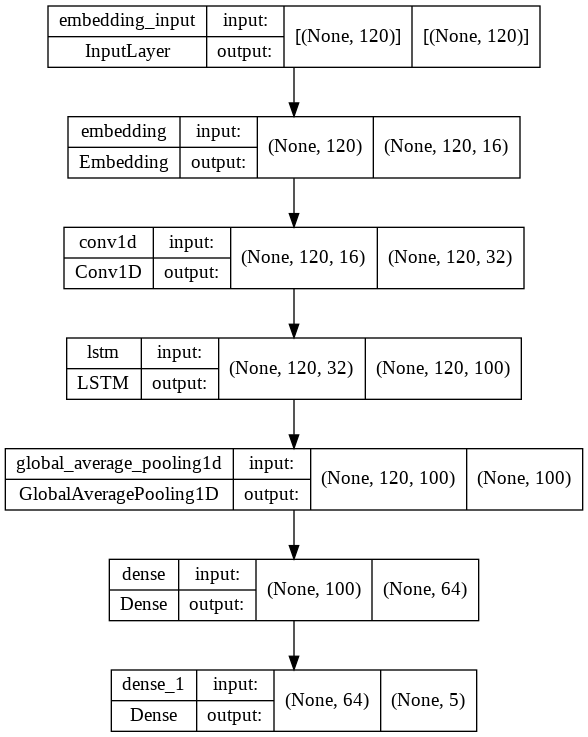

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='model2.png')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 120, 16)           311504    
                                                                 
 conv1d (Conv1D)             (None, 120, 32)           1568      
                                                                 
 lstm (LSTM)                 (None, 120, 100)          53200     
                                                                 
 global_average_pooling1d (G  (None, 100)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 5)                 325       
                                                        

In [28]:
print(training_padded.shape)
print(training_labels.shape)
print(testing_padded.shape)
print(testing_labels.shape)
num_epochs = 15
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels),
                   callbacks = [
        tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15), #stop training if accuracy doesn't improve in next 3 epoch
    ])

(37400, 120)
(37400, 5)
(6601, 120)
(6601, 5)
Epoch 1/15
1169/1169 [==============================] - 288s 243ms/step - loss: 1.2420 - accuracy: 0.4624 - val_loss: 0.9795 - val_accuracy: 0.6204
Epoch 2/15
1169/1169 [==============================] - 285s 244ms/step - loss: 0.8699 - accuracy: 0.6856 - val_loss: 0.8238 - val_accuracy: 0.7167
Epoch 3/15
1169/1169 [==============================] - 282s 241ms/step - loss: 0.7512 - accuracy: 0.7441 - val_loss: 0.7601 - val_accuracy: 0.7385
Epoch 4/15
1169/1169 [==============================] - 283s 242ms/step - loss: 0.6952 - accuracy: 0.7663 - val_loss: 0.7249 - val_accuracy: 0.7543
Epoch 5/15
1169/1169 [==============================] - 283s 242ms/step - loss: 0.6562 - accuracy: 0.7817 - val_loss: 0.7055 - val_accuracy: 0.7597
Epoch 6/15
1169/1169 [==============================] - 280s 240ms/step - loss: 0.6136 - accuracy: 0.7967 - val_loss: 0.6976 - val_accuracy: 0.7626
Epoch 7/15
1169/1169 [==============================] - 281s 240ms

In [29]:
print('commented')

commented


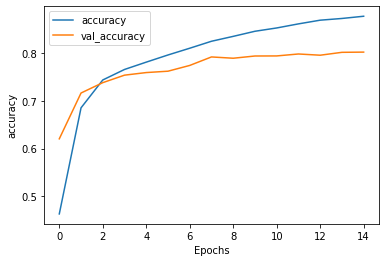

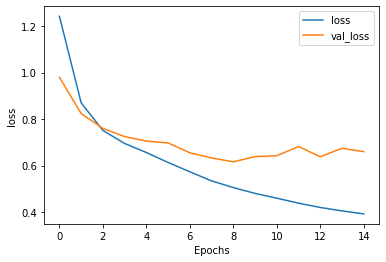

In [30]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [31]:
sentence = ['ржЪрзЗрж╣рж╛рж░рж╛ ржжрзЗржЦрж▓рзЗ ржмржорж┐ ржЖрж╕рзЗ']    
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

pred=model.predict(padded)[0]
print(pred)
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

[0.01727116 0.00554956 0.02700952 0.00205077 0.948119  ]
Not Bully : 0.017271165
Religious : 0.00554956
Sexual : 0.027009524
Troll : 0.948119
Threat : 0.0020507697


In [32]:
predictions = model.predict(testing_padded)
predictions = np.argmax(predictions, axis=1)

In [33]:
testing_labels=np.argmax(testing_labels, axis=1)

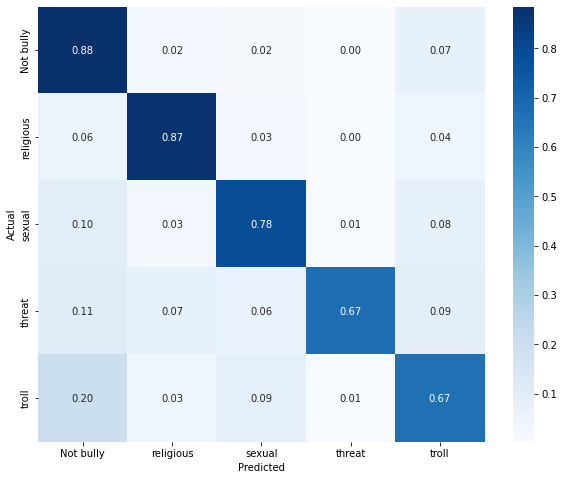

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sns
# print(testing_labels)
cm = confusion_matrix(testing_labels,predictions)
cm_plot_labels = ['Not bully', 'religious','sexual','threat','troll']
#plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=cm_plot_labels, yticklabels=cm_plot_labels, cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

In [35]:
from sklearn.metrics import classification_report
print(classification_report(testing_labels,predictions))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      2357
           1       0.85      0.87      0.86      1084
           2       0.83      0.78      0.81      1389
           3       0.85      0.67      0.75       252
           4       0.74      0.67      0.70      1519

    accuracy                           0.80      6601
   macro avg       0.81      0.78      0.79      6601
weighted avg       0.80      0.80      0.80      6601



In [36]:
#from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [37]:
#print(f1_score(testing_labels, predictions, average="macro"))
#print(precision_score(testing_labels, predictions, average="macro"))
#print(recall_score(testing_labels, predictions, average="macro"))  

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

testy = testing_labels
yhat_classes = predictions
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(testy, yhat_classes)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(testy, yhat_classes,average='micro')
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(testy, yhat_classes,average='micro')
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(testy, yhat_classes,average='macro')
print('F1 score: %f' % f1)

Accuracy: 0.802757
Precision: 0.802757
Recall: 0.802757
F1 score: 0.791576


In [39]:
Cyberbully_data = pd.read_csv('/content/drive/MyDrive/Thesis Slide/Datasets /Bangla Online Comments Dataset.csv', sep = ',', encoding = 'utf-8-sig')
comments = Cyberbully_data['comment'].values.tolist()

In [40]:
comments[2]

'ржЕрж░рзЗ ржмрж╛ржмрж╛, ржПржЗ ржЯрж╛ ржХрзЛржи ржкрж╛ржЧрж▓????'

In [42]:
sentence = ['ржЕржЗ ржмрзЗрж╢рзНржпрж╛рж░ ржХржерж╛ржЧрзБрж▓рзЛ рж╢рзБржирж▓рзЗржЗ ржмрзБржЭрж╛ ржпрж╛рзЯ ржХрж┐ ржЪржорзОржХрж╛рж░ ржбрж╛рзЯрж▓ржЧ рж╕рж╛ржЬрж┐рзЯрзЗржЫрзЗред ржкрж╢рзБрж░ ржмрж╛ржЪрзНржЪрж╛рж░рж╛редржХрж┐ржнрж╛ржмрзЗ рж╕ржВрж▓рж╛ржк ржЧрзБрж▓рзЛ ржмрж╛ржирж┐рзЯрзЗржЫрзЗред ржорж╣рж┐рж▓рж╛рж░ ржмрж╛рзЬрж┐рждрзЗ ржПржХржмрж╛рж░ ржЧрзЗржЫрж┐ ржЖрж░ ржХрзЛржирзЛ ржжрж┐ржи ржпрж╛ржмржирж╛ ржмрж┐рж╢рзНржмрж╛рж╕ ржХрж░ред... ржЕржнрж┐рж╢ржкрзНржд ржирж╛рж╕рзНрждрж┐ржХрж░рж╛ ржоржирзЗ ржХрж░рзЗ ржУржжрзЗрж░ ржЕржкржХрж░рзНржо ржорж╛ржирзБрж╖ ржмрзБржЭржмрзЗ ржирж╛ред ржорж╛ржирзБрж╖ ржХрж┐ ржУржжрзЗрж░ ржоржд ржмрж▓ржж ржЪрзЛржжрж╛ред ржЕржЗ ржмрзЗрж╢рзНржпрж╛ ржХржирзНржарзЗ ржХрждрж░ржХржо ржнрж╛ржмрзЗ ржбрж╛рзЯрж╛рж▓ржЧ ржжрж┐рзЯрзЗржЫрзЗ ржоржирзЗрж░ ржорж╛ржзрзБрж░рзА ржорж┐рж╢рж┐ржпрж╝рзЗ ржЖрж░ ржорж╛ржУрж▓рж╛ржирж╛ рж╕рж╛ржИржжрзАрж░ ржХржирзНржа ржбрж╛ржмрж┐ржВ ржХрж░рзЗ ржЬрзБрзЬрзЗ ржжрж┐рзЯрзЗржЫрзЗред ржХрзЯржжрж┐ржи ржХрж░ржмрзЗ ржПрж╕ржм? рж╢рзЗрж╖ рж░ржХрзНрж╖рж╛ рж╣ржмрзЗ рждрзЛ?']
sequences = tokenizer.texts_to_sequences(sentence)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
pred=model.predict(padded)[0]
top=np.argsort(pred)[-1]
print(label2D.columns[top].replace('label_',""))
print(pred)
print('Not Bully : '+str(pred[0]))
print('Religious : '+str(pred[1]))
print('Sexual : '+str(pred[2]))
print('Troll : '+str(pred[4]))
print('Threat : '+str(pred[3])) 

sexual
[0.0237201  0.05505284 0.81497115 0.00238369 0.10387211]
Not Bully : 0.023720104
Religious : 0.05505284
Sexual : 0.81497115
Troll : 0.103872105
Threat : 0.002383694
